In [55]:
from __future__ import print_function

# Setup
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from skimage import color

from time import time
from IPython.display import HTML

from seam_carving import energy_function
from seam_carving import compute_cost
from seam_carving import backtrack_seam
from seam_carving import reduce
from seam_carving import enlarge
from seam_carving import remove_object
from skimage import io, util

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 1332x756 with 0 Axes>

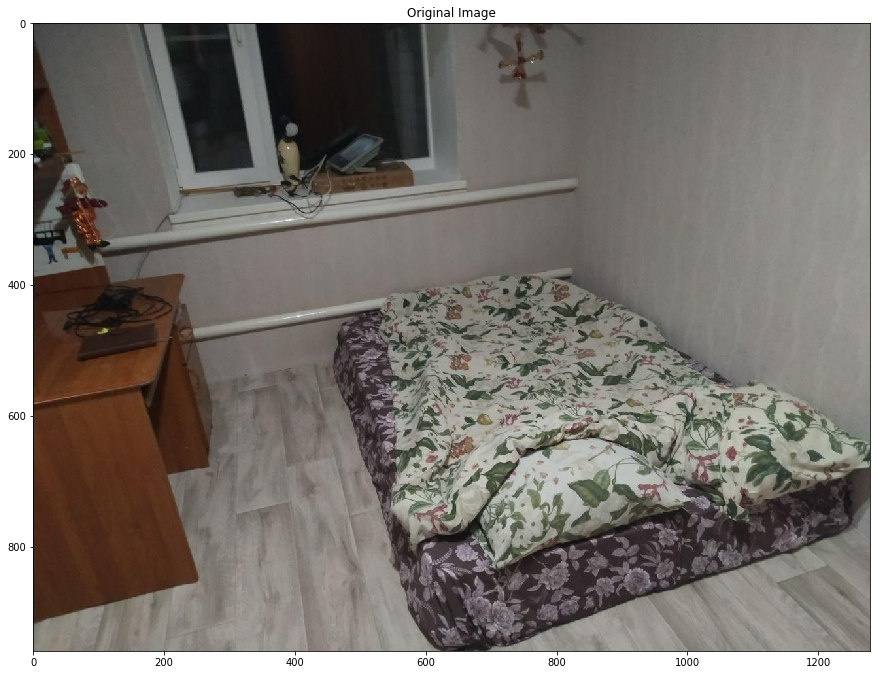

In [40]:
img = io.imread('test3.jpg')
img = util.img_as_float(img)

plt.title('Original Image')
plt.imshow(img)
plt.show()

In [41]:
img.shape

(960, 1280, 3)

Reducing width from 1280 to 900: 32.094983 seconds.


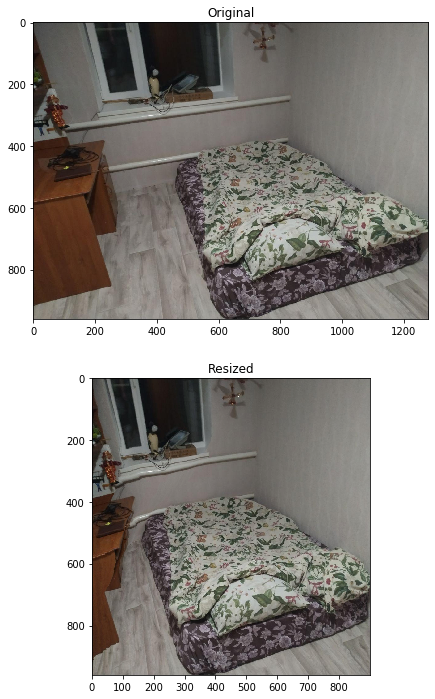

In [42]:
# Reduce image width
H, W, _ = img.shape
W_new = 900

start = time()
out = reduce(img, W_new)
end = time()

print("Reducing width from %d to %d: %f seconds." % (W, W_new, end - start))

plt.subplot(2, 1, 1)
plt.title('Original')
plt.imshow(img)

plt.subplot(2, 1, 2)
plt.title('Resized')
plt.imshow(out)

plt.show()

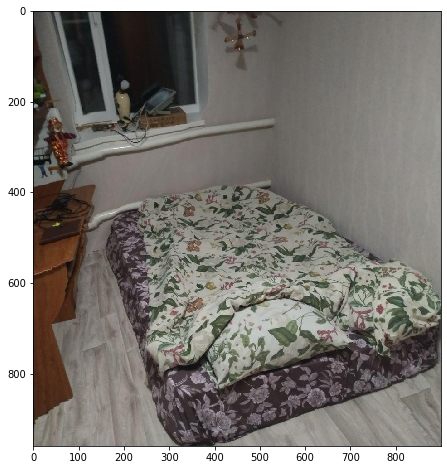

In [43]:
plt.figure(figsize=(13, 8))
plt.imshow(out)

Reducing width from 1280 to 1843: 94.214983 seconds.


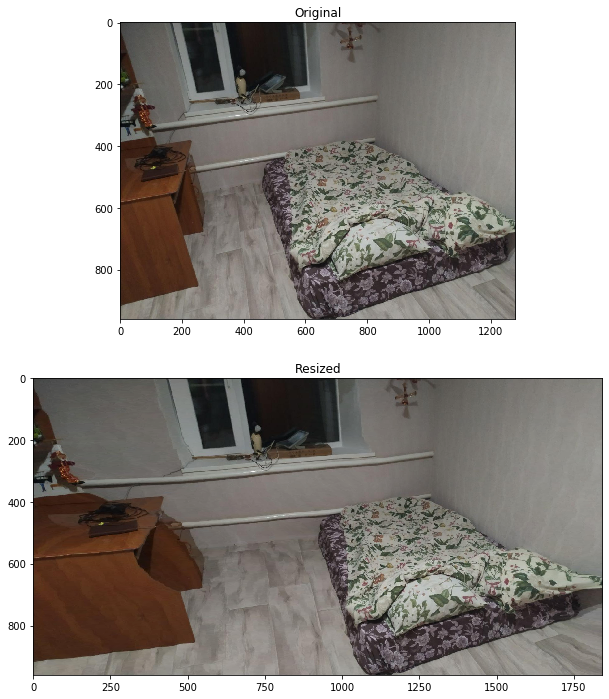

In [53]:
H, W, _ = img.shape

start = time()
W_new = int(W * 1.2)
out = enlarge(img, W_new)
W_new = int(W_new * 1.2)
out = enlarge(out, W_new)
end = time()

print("Reducing width from %d to %d: %f seconds." % (W, W_new, end - start))

plt.subplot(2, 1, 1)
plt.title('Original')
plt.imshow(img)

plt.subplot(2, 1, 2)
plt.title('Resized')
plt.imshow(out)

plt.show()

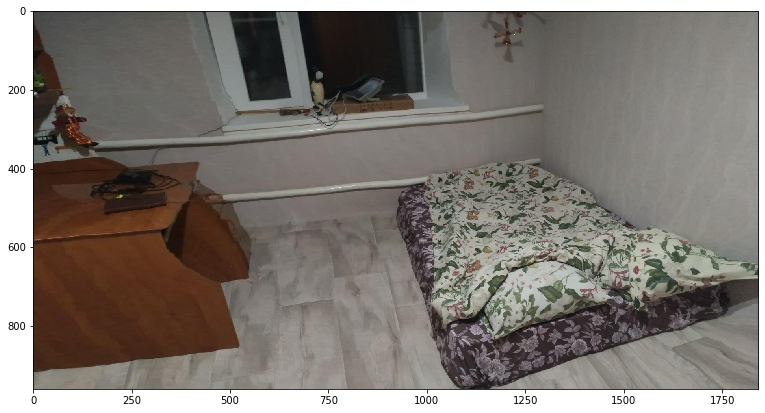

In [54]:
plt.figure(figsize=(13, 8))
plt.imshow(out)

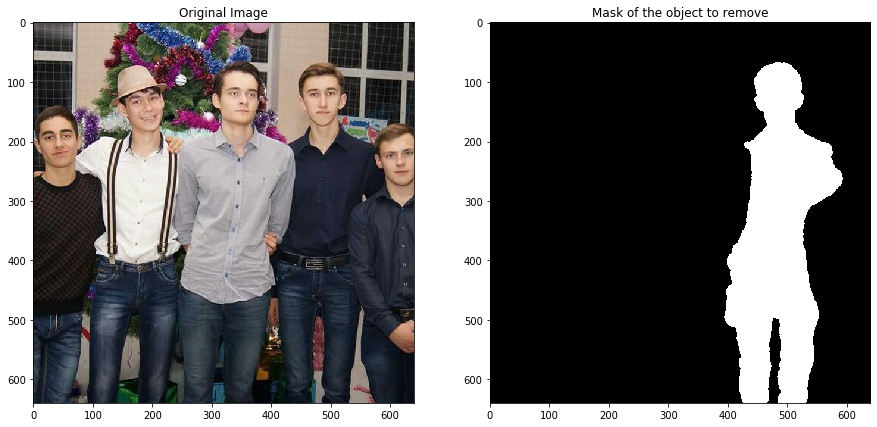

In [61]:
# Load image
image = io.imread('test667.jpg')
image = util.img_as_float(image)

mask = io.imread('test667_masked.jpg', as_gray=True)
mask = util.img_as_bool(mask)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('Mask of the object to remove')
plt.imshow(mask)

plt.show()

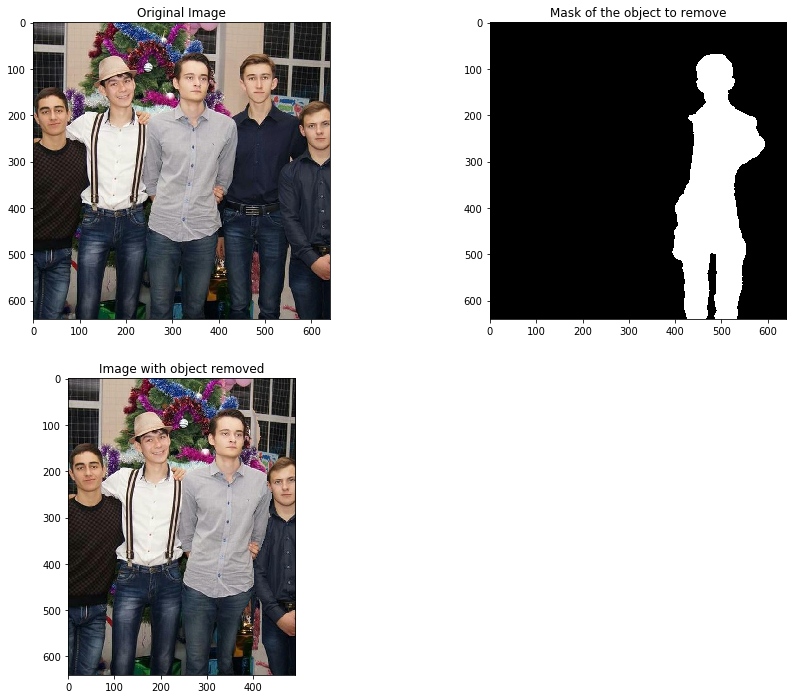

In [66]:
# Use your function to remove the object
out = remove_object(image, mask)

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.title('Mask of the object to remove')
plt.imshow(mask)

plt.subplot(2, 2, 3)
plt.title('Image with object removed')
plt.imshow(out)

plt.show()

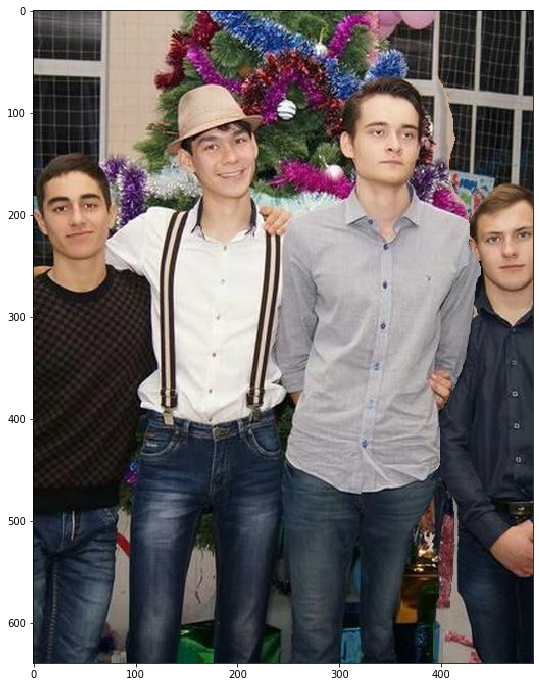

In [67]:
plt.imshow(out)